In [ ]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
# Load dataset
url = "/content/drive/MyDrive/DSS_assign/penguins.csv"
dataset = read_csv(url)

In [ ]:
print(dataset.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    male  
1       3800.0  female  
2       3250.0  female  
3          NaN     NaN  
4       3450.0  female  


In [ ]:
# dataset = dataset.drop(columns=['date'])


In [ ]:
print(dataset.head())


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    male  
1       3800.0  female  
2       3250.0  female  
3          NaN     NaN  
4       3450.0  female  


In [ ]:
# shape
print(dataset.shape)

(344, 7)


In [ ]:
# descriptions
print(dataset.describe())

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000


In [ ]:
# class distribution
print(dataset.groupby('body_mass_g').size())

body_mass_g
2700.0    1
2850.0    2
2900.0    4
2925.0    1
2975.0    1
         ..
5850.0    3
5950.0    2
6000.0    2
6050.0    1
6300.0    1
Length: 94, dtype: int64


# Visualizations

In [ ]:
dataset

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


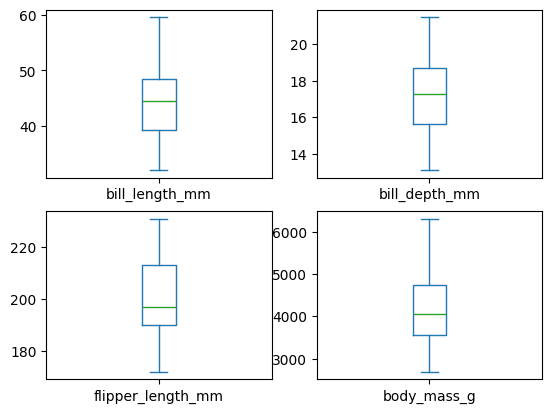

In [ ]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

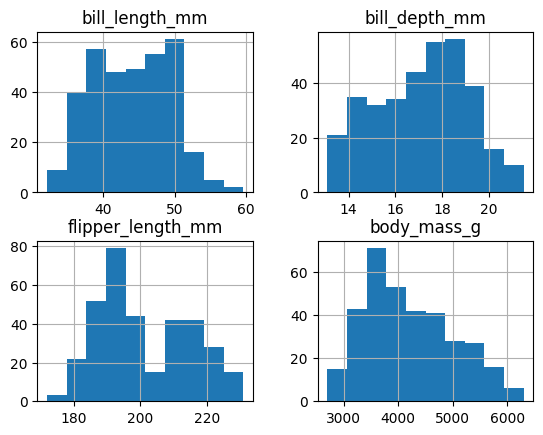

In [ ]:
# histograms
dataset.hist()
plt.show()

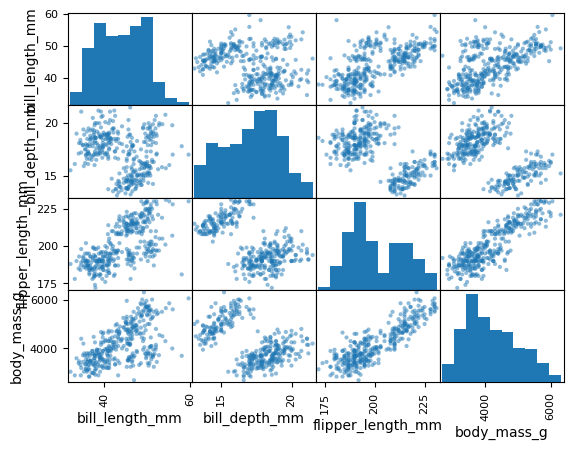

In [ ]:
# scatter plot matrix
scatter_matrix(dataset)
plt.show()

#Partitioning the Data

In [ ]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:3]
y = array[:,3]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

# Model Creation and Training


In [ ]:
# # Spot Check Algorithms
# models = []
# models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
# models.append(('LDA', LinearDiscriminantAnalysis()))
# models.append(('KNN', KNeighborsClassifier()))
# models.append(('CART', DecisionTreeClassifier()))
# models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC(gamma='auto')))
# # evaluate each model in turn
# results = []
# names = []
# for name, model in models:
# 	# Instead of StratifiedKFold, use KFold for continuous target variables
# 	from sklearn.model_selection import KFold
# 	kfold = KFold(n_splits=10, random_state=1, shuffle=True)
# 	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
# 	results.append(cv_results)
# 	names.append(name)
# 	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer


# Handle missing values
imputer = SimpleImputer(strategy='mean')
dataset['bill_length_mm'] = imputer.fit_transform(dataset[['bill_length_mm']])
dataset['bill_depth_mm'] = imputer.fit_transform(dataset[['bill_depth_mm']])
dataset['flipper_length_mm'] = imputer.fit_transform(dataset[['flipper_length_mm']])
dataset['body_mass_g'] = imputer.fit_transform(dataset[['body_mass_g']])
dataset['sex'].fillna(dataset['sex'].mode()[0], inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
dataset['species'] = label_encoder.fit_transform(dataset['species'])
dataset['island'] = label_encoder.fit_transform(dataset['island'])
dataset['sex'] = label_encoder.fit_transform(dataset['sex'])

# Split into features (X) and target (Y)
X = dataset.drop('species', axis=1)
Y = dataset['species']

# Split the dataset into training and validation sets
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.2, random_state=1)

# Train the model
model = SVC(gamma='auto')
model.fit(X_train, Y_train)

# Make predictions on the validation dataset
predictions = model.predict(X_validation)

# Display predictions
print("Predictions:", predictions)


Predictions: [0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 2 2 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0]


<ipython-input-24-6c446d6cf912>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['sex'].fillna(dataset['sex'].mode()[0], inplace=True)


<ipython-input-25-9383e7678fb5>:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=names)


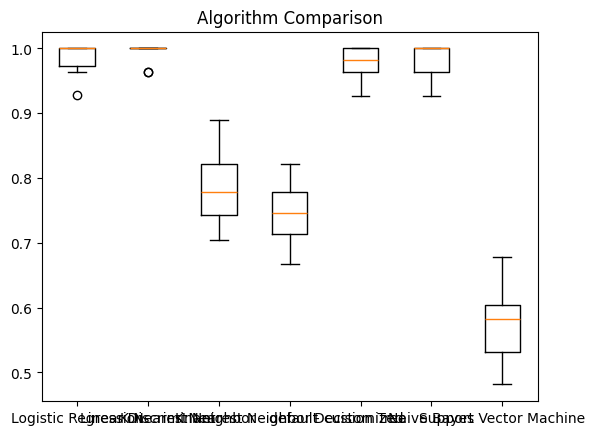

In [ ]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

# Prediction

In [ ]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [ ]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.6376811594202898
[[34  0  0]
 [15  0  0]
 [10  0 10]]
              precision    recall  f1-score   support

           0       0.58      1.00      0.73        34
           1       0.00      0.00      0.00        15
           2       1.00      0.50      0.67        20

    accuracy                           0.64        69
   macro avg       0.53      0.50      0.47        69
weighted avg       0.57      0.64      0.55        69



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#More Modelling

In [ ]:
models =[]
print(models)
#models.append(('Logistic Regression', LogisticRegression(solver ='liblinear'))) - fix convergence problem by adjusting solver
models.append(('Logistic Regression', LogisticRegression(max_iter=200))) #- fix convergence problem by adjusting max_iter
print(models)
models.append(('Linear Discriminant', LinearDiscriminantAnalysis()))
print(models)
models.append(('K Nearest Neighbor - default', KNeighborsClassifier()))

models.append(('K Nearest Neighbor - customized', KNeighborsClassifier(n_neighbors=20)))

models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Support Vector Machine', SVC(gamma='auto')))
print(models)

results = []
names = []


for name, model in models:
	print('=============================')
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
	print(cv_results)


[]
[('Logistic Regression', LogisticRegression(max_iter=200))]
[('Logistic Regression', LogisticRegression(max_iter=200)), ('Linear Discriminant', LinearDiscriminantAnalysis())]
[('Logistic Regression', LogisticRegression(max_iter=200)), ('Linear Discriminant', LinearDiscriminantAnalysis()), ('K Nearest Neighbor - default', KNeighborsClassifier()), ('K Nearest Neighbor - customized', KNeighborsClassifier(n_neighbors=20)), ('Decision Tree', DecisionTreeClassifier()), ('Naive Bayes', GaussianNB()), ('Support Vector Machine', SVC(gamma='auto'))]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression: 0.985582 (0.023813)
[1.         1.         1.         0.96428571 0.92857143 1.
 0.96296296 1.         1.         1.        ]
Linear Discriminant: 0.992725 (0.014553)
[1.         1.         1.         1.         0.96428571 1.
 1.         1.         1.         0.96296296]
K Nearest Neighbor - default: 0.785317 (0.057921)
[0.82142857 0.82142857 0.75       0.85714286 0.71428571 0.77777778
 0.74074074 0.88888889 0.7037037  0.77777778]
K Nearest Neighbor - customized: 0.741534 (0.048713)
[0.75       0.82142857 0.71428571 0.78571429 0.71428571 0.77777778
 0.74074074 0.77777778 0.66666667 0.66666667]
Decision Tree: 0.971032 (0.035352)
[0.96428571 0.89285714 1.         1.         0.96428571 0.92592593
 1.         0.96296296 1.         1.        ]
Naive Bayes: 0.978042 (0.029174)
[1.         1.         1.         0.92857143 1.         0.96296296
 1.         0.96296296 0.92592593 1.        ]
Support Vector Machine: 0.573942 (0.053435)
[0.67857143 0.57142857 0.60714286 0.57142

#Predictions

In [ ]:
model = KNeighborsClassifier(n_neighbors=20)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
predictions

# Evaluate predictions
print ('accuracy')
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

accuracy
0.6956521739130435
[[31  1  2]
 [14  0  1]
 [ 3  0 17]]
              precision    recall  f1-score   support

           0       0.65      0.91      0.76        34
           1       0.00      0.00      0.00        15
           2       0.85      0.85      0.85        20

    accuracy                           0.70        69
   macro avg       0.50      0.59      0.54        69
weighted avg       0.56      0.70      0.62        69

